# Pulled Momentum Data for All Injury Plays
## Initial EDA

In [1]:
import pandas as pd
import os
import glob
pd.options.display.max_columns = 100

%matplotlib inline

In [4]:
path = '../working/playlevel/momentum/'
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, index_col=0) for f in all_files))
df = df.drop('index', axis=1)

In [5]:
df.head()

,time,gsisid,x,y,o,dir,dis,role,mph,generalized_role,punting_returning_team,dis_meters,v_mps,dir_radians,o_radians,momentum,momentum_x,momentum_y,gsisid1,x1,y1,o1,dir1,dis1,role1,mph1,generalized_role1,punting_returning_team1,dis_meters1,v_mps1,dir_radians1,o_radians1,momentum1,momentum_x1,momentum_y1,gsisid2,x2,y2,o2,dir2,dis2,role2,mph2,generalized_role2,punting_returning_team2,dis_meters2,v_mps2,dir_radians2,o_radians2,momentum2,momentum_x2,momentum_y2,gsisid3,x3,y3,o3,dir3,dis3,role3,mph3,generalized_role3,punting_returning_team3,dis_meters3,v_mps3,dir_radians3,o_radians3,momentum3,momentum_x3,momentum_y3,distance_to_1,distance_to_2,distance_to_3,opp_momentum1,opp_momentum2,opp_momentum3,Season_Year,GameKey,PlayID
0,2016-12-18 20:55:40.500,27654.0,24.26,46.580002,13.770000,77.919998,0.01,GL,0.204545,Gunner,Punting_Team,0.009144,0.091441,1.359961,0.240332,10.197533,2.134112,9.971722,31688.0,26.379999,46.230000,168.869995,80.029999,0.01,VR,0.204545,Jammer,Returning_Team,0.009144,0.091441,1.396787,2.947337,10.197533,1.765525,10.043535,31600.0,27.400000,33.299999,192.009995,359.010010,0.13,PLR,2.659091,Defensive_Backer,Returning_Team,0.118873,1.188734,6.265907,3.351207,132.567923,132.548135,-2.290473,32171.0,23.900000,30.50,2.240000,274.720001,0.03,PLG,0.613636,Punting_Lineman,Punting_Team,0.027432,0.274323,4.794769,0.039095,30.592598,2.517355,-30.488850,2.148697,13.646174,14.112766,0.375518,130.989231,40.462387,2016,280,3746
1,2016-12-18 20:55:40.500,28846.0,24.49,6.740000,324.239990,137.820007,0.00,GR,0.000000,Gunner,Punting_Team,0.000000,0.000000,2.405413,5.659055,0.000000,-0.000000,0.000000,31743.0,25.950001,7.340000,192.940002,97.769997,0.01,VL,0.204545,Jammer,Returning_Team,0.009144,0.091441,1.706408,3.367438,10.197533,-1.378673,10.103907,31491.0,25.340000,26.850000,213.860001,286.309998,0.03,PDL2,0.613636,Defensive_Lineman,Returning_Team,0.027432,0.274323,4.997052,3.732561,30.592598,8.591447,-29.361439,32525.0,22.120001,27.43,352.470001,262.910004,0.06,PRW,1.227273,Punting_Wing,Punting_Team,0.054865,0.548647,4.588645,6.151762,61.185196,-7.551980,-60.717344,1.578481,20.127956,20.825298,10.197533,30.592598,61.185196,2016,280,3746
2,2016-12-18 20:55:40.500,29304.0,11.36,29.240000,37.939999,70.260002,0.01,P,0.204545,Punter,Punting_Team,0.009144,0.091441,1.226268,0.662178,10.197533,3.444241,9.598275,31731.0,20.070000,28.430000,351.549988,334.829987,0.00,PPR,0.000000,Punter_Protector,Punting_Team,0.000000,0.000000,5.843886,6.135705,0.000000,0.000000,-0.000000,32525.0,22.120001,27.430000,352.470001,262.910004,0.06,PRW,1.227273,Punting_Wing,Punting_Team,0.054865,0.548647,4.588645,6.151762,61.185196,-7.551980,-60.717344,31085.0,25.620001,28.91,180.919998,292.059998,0.04,PDL3,0.818182,Defensive_Lineman,Returning_Team,0.036576,0.365764,5.097409,3.157650,40.790131,15.319847,-37.803929,8.747583,10.911174,12.542444,10.197533,71.170240,48.867156,2016,280,3746
3,2016-12-18 20:55:40.500,31075.0,23.92,26.120001,170.389999,201.169998,0.45,PDL1,9.204545,Defensive_Lineman,Returning_Team,0.411485,4.114850,3.511079,2.973867,458.888970,-427.919944,-165.721477,31491.0,25.340000,26.850000,213.860001,286.309998,0.03,PDL2,0.613636,Defensive_Lineman,Returning_Team,0.027432,0.274323,4.997052,3.732561,30.592598,8.591447,-29.361439,32968.0,23.840000,27.990000,331.309998,264.420013,0.06,PRT,1.227273,Punting_Lineman,Punting_Team,0.054865,0.548647,4.615000,5.782450,61.185196,-5.949359,-60.895266,32525.0,22.120001,27.43,352.470001,262.910004,0.06,PRW,1.227273,Punting_Wing,Punting_Team,0.054865,0.548647,4.588645,6.151762,61.185196,-7.551980,-60.717344,1.596653,1.871709,2.226229,457.314175,434.796170,433.284079,2016,280,3746
4,2016-12-18 20:55:40.500,31491.0,25.34,26.850000,213.860001,286.309998,0.03,PDL2,0.613636,Defensive_Lineman,Returning_Team,0.027432,0.274323,4.997052,3.732561,30.592598,8.591447,-29.361439,31075.0,23.920000,26.120001,170.389999,201.169998,0.45,PDL1,9.204545,Defensive_Lineman,Returning_Team,0.411485,4.114850,3.511079,2.973867,458.888970

In [6]:
df.shape

(85169, 78)

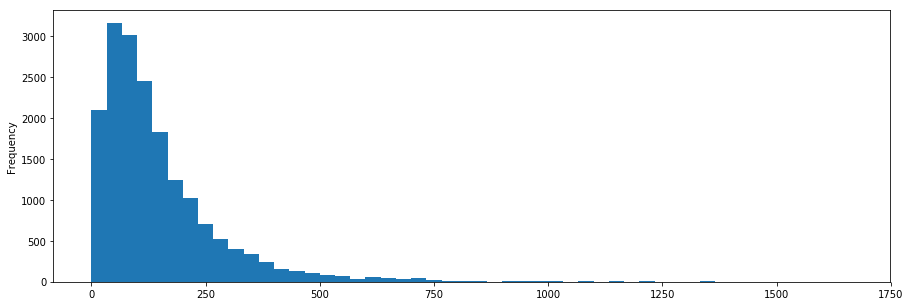

In [7]:
df.loc[df['distance_to_1'] < 1].sort_values('opp_momentum1')['opp_momentum1'].plot(kind='hist', bins=50, figsize=(15 ,5))

# Load Injury Play Details

In [10]:
vr = pd.read_csv('../working/vr-with-roles.csv', index_col=0)

# Players with high risk

In [12]:
df_high_risk = df.loc[(df['distance_to_1'] < 1) &
                      (df['opp_momentum1'] > 400)]

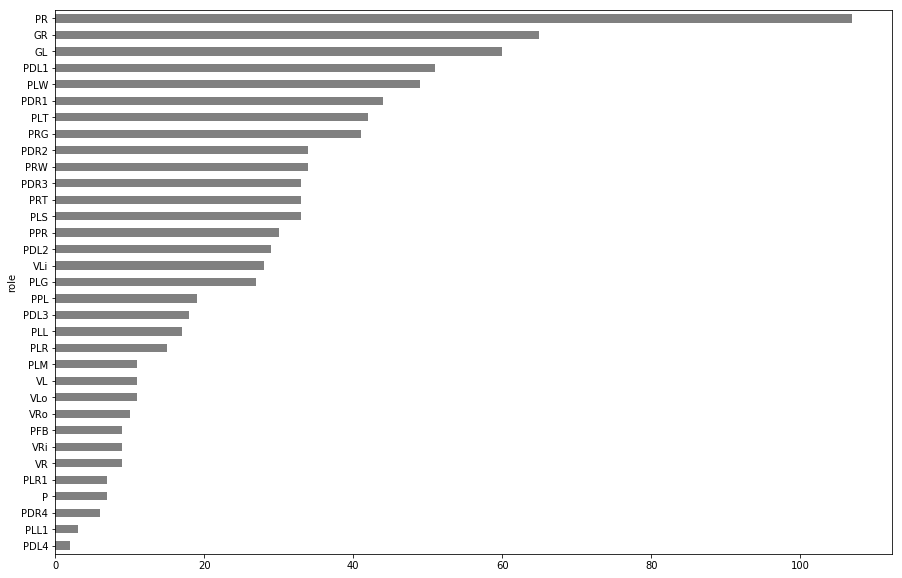

In [14]:
df_high_risk.groupby('role').count()['time'].sort_values().plot(figsize=(15, 10), kind='barh', color='grey')

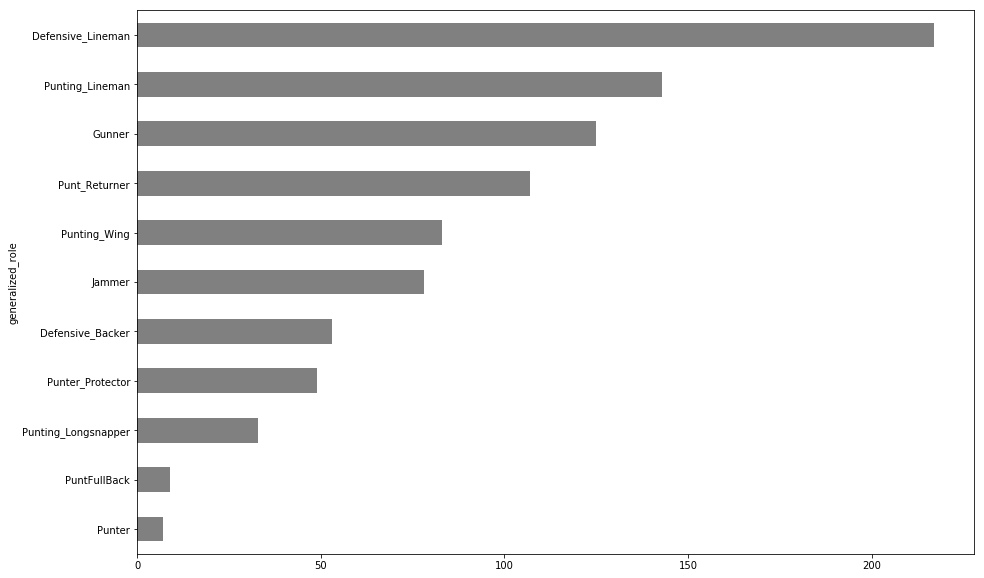

In [15]:
df_high_risk.groupby('generalized_role').count()['time'].sort_values().plot(figsize=(15, 10), kind='barh', color='grey')

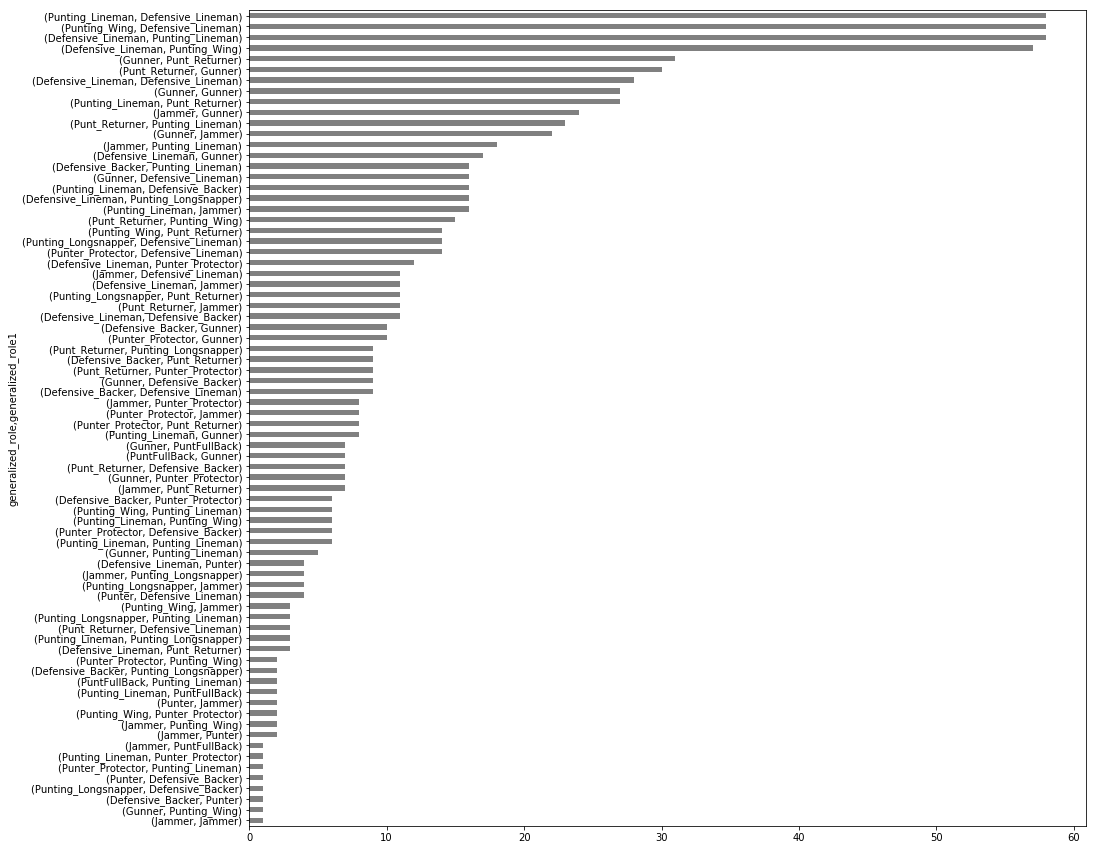

In [16]:
df_high_risk.groupby(['generalized_role','generalized_role1']).count()['time'].sort_values().plot(figsize=(15, 15), kind='barh', color='grey')

# Only the moments involving the 2 injured players

In [25]:
len(vr.dropna())

33

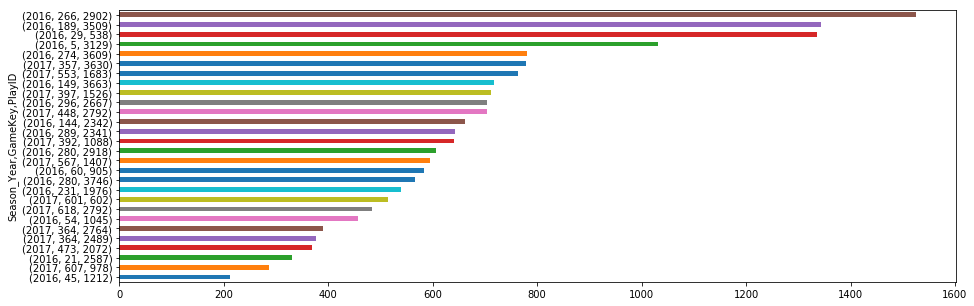

In [53]:
df.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid1'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid1','role']) \
    .max()['opp_momentum1'] \
    .reset_index() \
    .set_index(['Season_Year','GameKey','PlayID'])['opp_momentum1'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5))

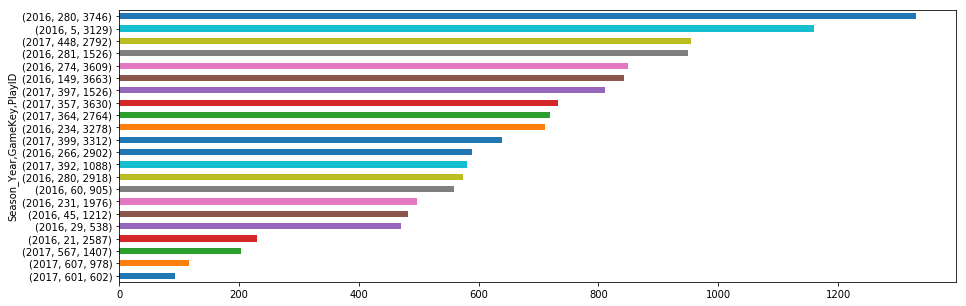

In [54]:
df.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid2'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid2','role']) \
    .max()['opp_momentum2'] \
    .reset_index() \
    .set_index(['Season_Year','GameKey','PlayID'])['opp_momentum2'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5))

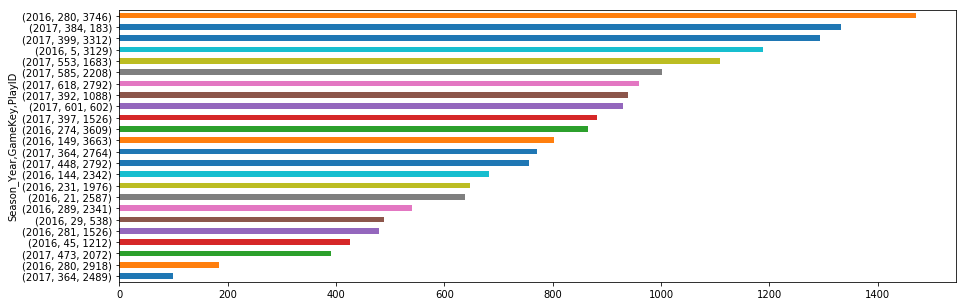

In [55]:
df.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid3'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid3','role']) \
    .max()['opp_momentum3'] \
    .reset_index() \
    .set_index(['Season_Year','GameKey','PlayID'])['opp_momentum3'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5))

# Combine top 3

In [75]:
df_flattened = pd.concat([df[['Season_Year', 'GameKey',
                              'PlayID', 'gsisid', 'gsisid1',
                              'role', 'role1', 'distance_to_1',
                              'opp_momentum1']].rename(columns={'role1': 'role_partner',
                                                                'distance_to_1': 'distance_to_partner',
                                                                'gsisid1': 'gsisid_partner',
                                                                'opp_momentum1': 'opp_momentum_partner'}),
                          df[['Season_Year', 'GameKey',
                              'PlayID', 'gsisid', 'gsisid2',
                              'role', 'role2', 'distance_to_2',
                              'opp_momentum2']].rename(columns={'role2': 'role_partner',
                                                                'distance_to_2': 'distance_to_partner',
                                                                'gsisid2': 'gsisid_partner',
                                                                'opp_momentum2': 'opp_momentum_partner'}),
                          df[['Season_Year', 'GameKey',
                              'PlayID', 'gsisid', 'gsisid3',
                              'role', 'role3', 'distance_to_3',
                              'opp_momentum3']].rename(columns={'role3': 'role_partner',
                                                                'distance_to_3': 'distance_to_partner',
                                                                'gsisid3': 'gsisid_partner',
                                                                'opp_momentum3': 'opp_momentum_partner'}),
                          ])

[Text(0.5,0,'Max Opposing Momentum between Injured Player and Primary Partner (kg⋅m/s)')]

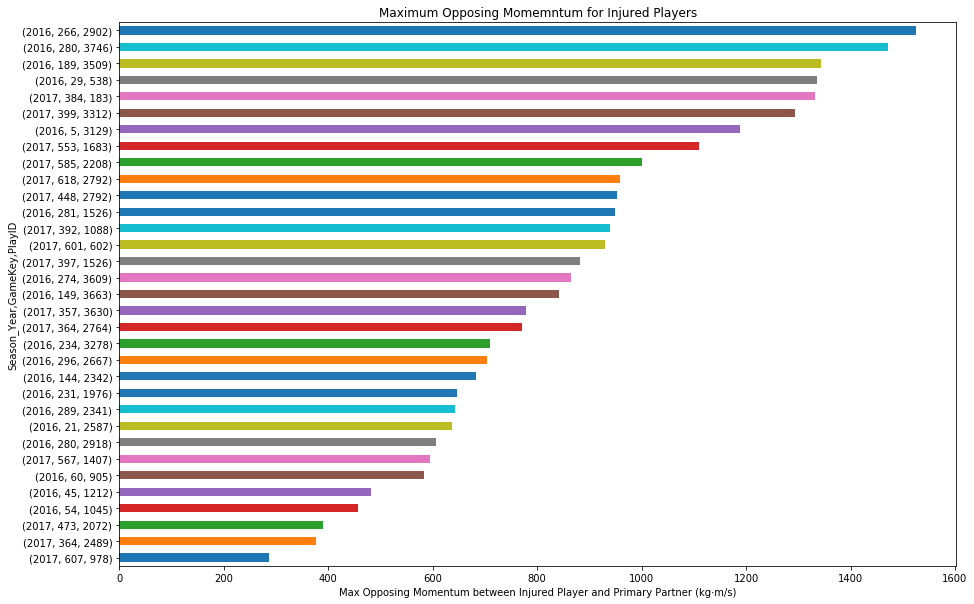

In [99]:
ax = df_flattened.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .max()['opp_momentum_partner'] \
    .reset_index() \
    .set_index(['Season_Year','GameKey','PlayID'])['opp_momentum_partner'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 10), title='Maximum Opposing Momemntum for Injured Players')
ax.set(xlabel='Max Opposing Momentum between Injured Player and Primary Partner (kg⋅m/s)')

## Only less than 1 yard away

[Text(0.5,0,'Max Opposing Momentum between Injured Player and Primary Partner (kg⋅m/s)')]

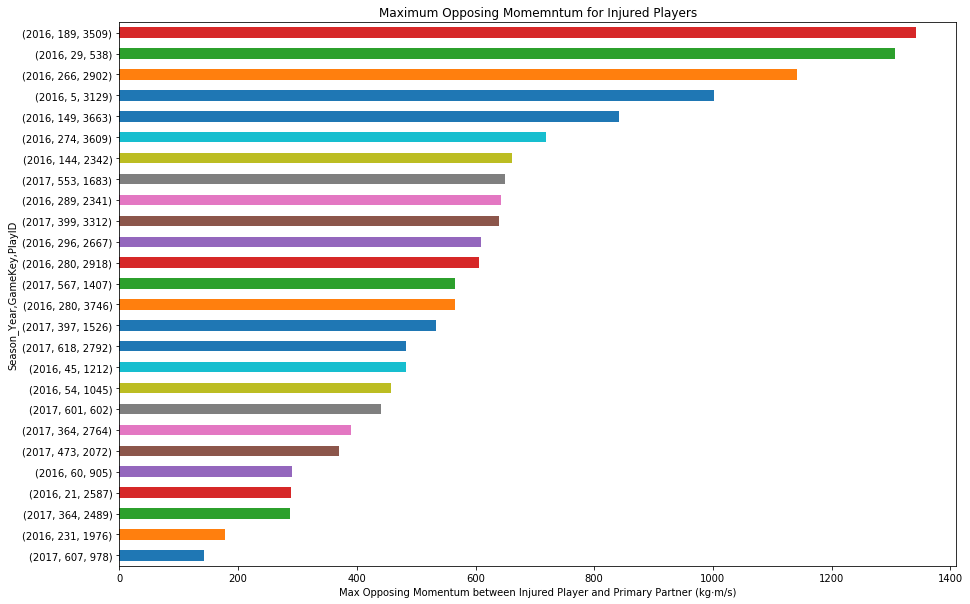

In [106]:
ax = df_flattened.loc[df_flattened['distance_to_partner'] < 1].merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .max()['opp_momentum_partner'] \
    .reset_index() \
    .set_index(['Season_Year','GameKey','PlayID'])['opp_momentum_partner'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 10), title='Maximum Opposing Momemntum for Injured Players')
ax.set(xlabel='Max Opposing Momentum between Injured Player and Primary Partner (kg⋅m/s)')

In [116]:
len(df_flattened.loc[df_flattened['distance_to_partner'] < 2].merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .min())

30

In [122]:
df_flattened.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .min()[['role_partner','distance_to_partner']].sort_values('distance_to_partner')

role_partner  \
Season_Year GameKey PlayID gsisid  gsisid_partner role                
2016        266     2902   23564.0 31844.0        PR             GR   
            21      2587   29343.0 31059.0        GL           PLL1   
            45      1212   33121.0 28249.0        PRT            PR   
            54      1045   32444.0 31756.0        PRT            GR   
2017        607     978    29793.0 32114.0        PLW          PDR2   
2016        280     2918   32120.0 32725.0        PLW          PDR1   
            274     3609   23742.0 31785.0        P             VLo   
            280     3746   27654.0 33127.0        GL             PR   
            144     2342   32410.0 23259.0        VR            PLG   
2017        567     1407   32403.0 32891.0        PLL            GR   
            397     1526   32894.0 31763.0        PLT            PR   
            364     2764   32323.0 31930.0        PLG          PDR1   
2016        289     2341   32007.0 32998.0        GL           PDR3   
            149     3663   28128.0 29629.0        PFB           PRT   
            60      905    30786.0 29815.0        PRW          PDL1   
            296     2667   32783.0 32810.0        GL             GR   
2017        618     2792   31950.0 32677.0        PRG          PDR1   
            473     2072   29492.0 33445.0        PRG           PLT   
            364     2489   31313.0 32851.0        PLT          PDR2   
2016        189     3509   27595.0 31950.0        PR            PRG   
2017        399     3312   26035.0 27442.0        PR            PRT   
2016        231     1976   32214.0 32807.0        PLG           PRW   
2017        601     602    33260.0 31697.0        PLS            PR   
2016        5       3129   31057.0 32482.0        PLW            PR   
2017        553     1683   32820.0 25503.0        PDL2          PLS   
2016        29      538    31023.0 31941.0        GR             PR   
2017        357     3630   30171.0 29384.0        PRG            PR   
2016        281     1526   28987.0 30789.0        PLG           PLW   
2017        392     1088   32615.0 31999.0        PLS          PDL1   
            448     2792   33838.0 31317.0        PDR1          PRG   
            384     183    33813.0 33841.0        PPR           PLT   
            585     2208   33069.0 24535.0        PR            PPR   
2016        234     3278   28620.0 27860.0        PRG            PR   

                                                        distance_to_partner  
Season_Year GameKey PlayID gsisid  gsisid_partner role                       
2016        266     2902   23564.0 31844.0        PR               0.094337  
            21      2587   29343.0 31059.0        GL               0.117048  
            45      1212   33121.0 28249.0        PRT              0.170882  
            54      1045   32444.0 31756.0        PRT              0.171172  
2017        607     978    29793.0 32114.0        PLW              0.221358  
2016        280     2918   32120.0 32725.0        PLW              0.269254  
            274     3609   23742.0 31785.0        P                0.289999  
            280     3746   27654.0 33127.0        GL               0.299998  
            144     2342   32410.0 23259.0        VR               0.317649  
2017        567     1407   32403.0 32891.0        PLL              0.339996  
            397     1526   32894.0 31763.0        PLT              0.372159  
            364     2764   32323.0 31930.0        PLG              0.390515  
2016        289     2341   32007.0 32998.0        GL               0.417615  
            149     3663   28128.0 29629.0        PFB              0.421546  
            60      905    30786.0 29815.0        PRW              0.422964  
            296     2667   32783.0 32810.0        GL               0.462385  
2017        618     2792   31950.0 32677.0        PRG              0.510783  
            473     2072   29492.0 33445.0        PRG              0.529529  
         

# Hmmm - we are missing some plays when looking at <1 yard away. After taking a look it seems our play data is cut off before the injury.

## Rerunning preprocessing on all play data

In [173]:
path = '../working/playlevel/momentum/'
all_files = glob.glob(os.path.join(path, "*-alldata.csv"))

df = pd.concat((pd.read_csv(f, index_col=0) for f in all_files))
df = df.drop('index', axis=1)

In [193]:
df.merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .min()[['role_partner','distance_to_partner','momentum','momentum_partner','opp_momentum']].sort_values('distance_to_partner')

role_partner  \
Season_Year GameKey PlayID gsisid  gsisid_partner role                
2016        266     2902   23564.0 31844.0        PR             GR   
            21      2587   29343.0 31059.0        GL           PLL1   
            45      1212   33121.0 28249.0        PRT            PR   
            54      1045   32444.0 31756.0        PRT            GR   
2017        607     978    29793.0 32114.0        PLW          PDR2   
2016        234     3278   28620.0 27860.0        PRG            PR   
            189     3509   27595.0 31950.0        PR            PRG   
            280     2918   32120.0 32725.0        PLW          PDR1   
            274     3609   23742.0 31785.0        P             VLo   
            280     3746   27654.0 33127.0        GL             PR   
            144     2342   32410.0 23259.0        VR            PLG   
2017        567     1407   32403.0 32891.0        PLL            GR   
            397     1526   32894.0 31763.0        PLT            PR   
2016        281     1526   28987.0 30789.0        PLG           PLW   
2017        364     2764   32323.0 31930.0        PLG          PDR1   
2016        289     2341   32007.0 32998.0        GL           PDR3   
            149     3663   28128.0 29629.0        PFB           PRT   
            60      905    30786.0 29815.0        PRW          PDL1   
            296     2667   32783.0 32810.0        GL             GR   
2017        618     2792   31950.0 32677.0        PRG          PDR1   
            473     2072   29492.0 33445.0        PRG           PLT   
            364     2489   31313.0 32851.0        PLT          PDR2   
2016        231     1976   32214.0 32807.0        PLG           PRW   
2017        399     3312   26035.0 27442.0        PR            PRT   
            601     602    33260.0 31697.0        PLS            PR   
2016        5       3129   31057.0 32482.0        PLW            PR   
2017        553     1683   32820.0 25503.0        PDL2          PLS   
            585     2208   33069.0 24535.0        PR            PPR   
            357     3630   30171.0 29384.0        PRG            PR   
2016        29      538    31023.0 31941.0        GR             PR   
2017        448     2792   33838.0 31317.0        PDR1          PRG   
            384     183    33813.0 33841.0        PPR           PLT   
            392     1088   32615.0 31999.0        PLS          PDL1   

                                                        distance_to_partner  \
Season_Year GameKey PlayID gsisid  gsisid_partner role                        
2016        266     2902   23564.0 31844.0        PR               0.094337   
            21      2587   29343.0 31059.0        GL               0.117048   
            45      1212   33121.0 28249.0        PRT              0.170882   
            54      1045   32444.0 31756.0        PRT              0.171172   
2017        607     978    29793.0 32114.0        PLW              0.221358   
2016        234     3278   28620.0 27860.0        PRG              0.259425   
            189     3509   27595.0 31950.0        PR               0.262489   
            280     2918   32120.0 32725.0        PLW              0.269254   
            274     3609   23742.0 31785.0        P                0.289999   
            280     3746   27654.0 33127.0        GL               0.299998   
            144     2342   32410.0 23259.0        VR               0.317649   
2017        567     1407   32403.0 32891.0        PLL              0.339996   
            397     1526   32894.0 31763.0        PLT              0.372159   
2016        281     1526   28987.0 30789.0        PLG              0.380133   
2017        364     2764   32323.0 31930.0        PLG              0.390515   
2016        289     2341   32007.0 32998.0        GL               0.417615   
            149     3663   28128.0 29629.0        PFB              0.421546   
            60      905    30786.0 29815.0        PRW              0

In [194]:
df.loc[df['distance_to_partner']<2].merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .min()[['role_partner','distance_to_partner','momentum','momentum_partner','opp_momentum']].sort_values('opp_momentum')

role_partner  \
Season_Year GameKey PlayID gsisid  gsisid_partner role                
2017        553     1683   32820.0 25503.0        PDL2          PLS   
            364     2489   31313.0 32851.0        PLT          PDR2   
            397     1526   32894.0 31763.0        PLT            PR   
            607     978    29793.0 32114.0        PLW          PDR2   
2016        231     1976   32214.0 32807.0        PLG           PRW   
2017        399     3312   26035.0 27442.0        PR            PRT   
            585     2208   33069.0 24535.0        PR            PPR   
2016        45      1212   33121.0 28249.0        PRT            PR   
            149     3663   28128.0 29629.0        PFB           PRT   
2017        601     602    33260.0 31697.0        PLS            PR   
2016        21      2587   29343.0 31059.0        GL           PLL1   
2017        618     2792   31950.0 32677.0        PRG          PDR1   
2016        280     3746   27654.0 33127.0        GL             PR   
2017        357     3630   30171.0 29384.0        PRG            PR   
            364     2764   32323.0 31930.0        PLG          PDR1   
            473     2072   29492.0 33445.0        PRG           PLT   
2016        266     2902   23564.0 31844.0        PR             GR   
            54      1045   32444.0 31756.0        PRT            GR   
            60      905    30786.0 29815.0        PRW          PDL1   
2017        384     183    33813.0 33841.0        PPR           PLT   
2016        274     3609   23742.0 31785.0        P             VLo   
2017        392     1088   32615.0 31999.0        PLS          PDL1   
2016        281     1526   28987.0 30789.0        PLG           PLW   
            234     3278   28620.0 27860.0        PRG            PR   
            296     2667   32783.0 32810.0        GL             GR   
            189     3509   27595.0 31950.0        PR            PRG   
2017        448     2792   33838.0 31317.0        PDR1          PRG   
2016        280     2918   32120.0 32725.0        PLW          PDR1   
2017        567     1407   32403.0 32891.0        PLL            GR   
2016        144     2342   32410.0 23259.0        VR            PLG   
            289     2341   32007.0 32998.0        GL           PDR3   
            5       3129   31057.0 32482.0        PLW            PR   
            29      538    31023.0 31941.0        GR             PR   

                                                        distance_to_partner  \
Season_Year GameKey PlayID gsisid  gsisid_partner role                        
2017        553     1683   32820.0 25503.0        PDL2             0.718471   
            364     2489   31313.0 32851.0        PLT              0.533103   
            397     1526   32894.0 31763.0        PLT              0.372159   
            607     978    29793.0 32114.0        PLW              0.221358   
2016        231     1976   32214.0 32807.0        PLG              0.541202   
2017        399     3312   26035.0 27442.0        PR               0.581376   
            585     2208   33069.0 24535.0        PR               0.765313   
2016        45      1212   33121.0 28249.0        PRT              0.170882   
            149     3663   28128.0 29629.0        PFB              0.421546   
2017        601     602    33260.0 31697.0        PLS              0.636555   
2016        21      2587   29343.0 31059.0        GL               0.117048   
2017        618     2792   31950.0 32677.0        PRG              0.510783   
2016        280     3746   27654.0 33127.0        GL               0.299998   
2017        357     3630   30171.0 29384.0        PRG              0.787717   
            364     2764   32323.0 31930.0        PLG              0.390515   
            473     2072   29492.0 33445.0        PRG              0.529529   
2016        266     2902   23564.0 31844.0        PR               0.094337   
            54      1045   32444.0 31756.0        PRT              0

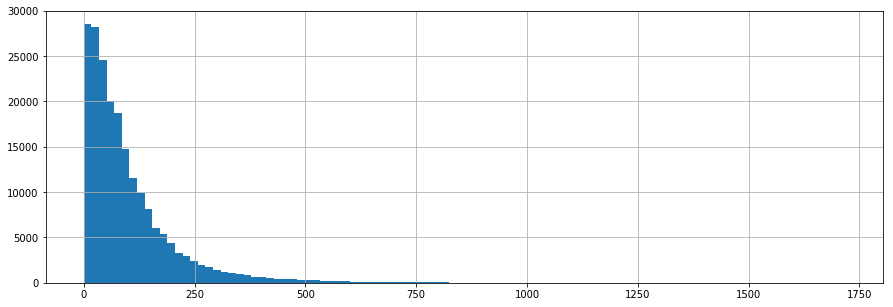

In [197]:
df.loc[df['distance_to_partner'] < 1.5]['opp_momentum'].hist(figsize=(15, 5), bins=100)

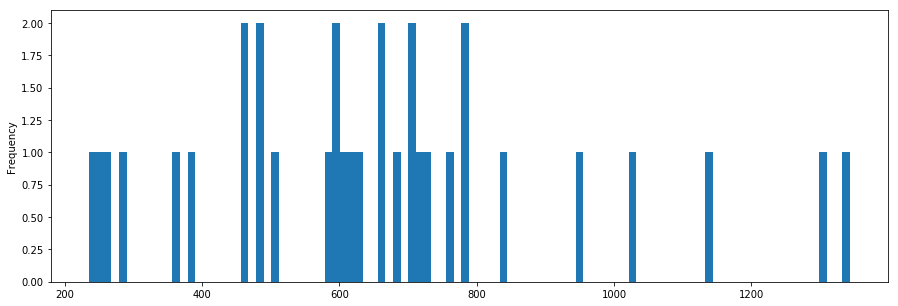

In [198]:
df.loc[df['distance_to_partner']<1.5].merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID']) \
    .groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner','role']) \
    .max()[['role_partner','distance_to_partner','momentum','momentum_partner','opp_momentum']].sort_values('distance_to_partner')['opp_momentum'] \
    .plot(kind='hist', figsize=(15, 5), bins=100)

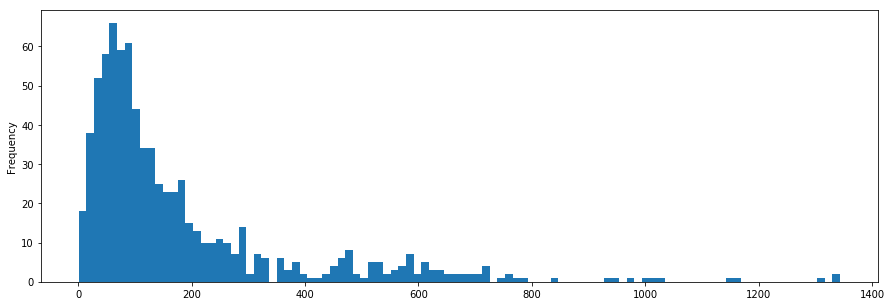

In [200]:
df.loc[df['distance_to_partner']<1.5].merge(vr, left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
        right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID'])['opp_momentum'] \
    .plot(kind='hist', figsize=(15, 5), bins=100)

In [202]:
pi.shape

(6681, 14)

In [208]:
(6681 - 250 - 187) / 3

2081.3333333333335

In [209]:
2081 + 250

2331

In [206]:
pi.iloc[1670:]

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
1670,2016,Reg,164,10/23/2016,7,2911,12:31,MIA 39,4,Punt,BUF,MIA-BUF,14 - 17,(12:31) (Punt formation) PENALTY on BUF-C.Schm...
1671,2016,Reg,164,10/23/2016,7,2939,12:22,MIA 44,4,Punt,BUF,MIA-BUF,14 - 17,(12:22) (Punt formation) C.Schmidt punts 43 ya...
1672,2016,Reg,164,10/23/2016,7,3076,09:28,BUF 40,4,Punt,MIA,MIA-BUF,14 - 17,(9:28) (Punt formation) M.Darr punts 40 yards ...
1673,2016,Reg,164,10/23/2016,7,3167,07:55,BUF 15,4,Punt,BUF,MIA-BUF,14 - 17,(7:55) (Punt formation) C.Schmidt punts 57 yar...
1674,2016,Reg,164,10/23/2016,7,3516,03:38,BUF 25,4,Punt,BUF,MIA-BUF,21 - 17,(3:38) (Punt formation) C.Schmidt punts 54 yar...
1675,2016,Reg,165,10/23/2016,7,188,12:52,BLT 36,1,Punt,BLT,NYJ-BLT,0 - 0,"(12:52) S.Koch punts 59 yards to NYJ 5, Center..."
1676,2016,Reg,165,10/23/2016,7,347,09:45,NYJ 29,1,Punt,NYJ,NYJ-BLT,0 - 6,(9:45) (Punt formation) L.Edwards FUMBLES (Abo...
1677,2016,Reg,165,10/23/2016,7,566,06:39,NYJ 48,1,Punt,NYJ,NYJ-BLT,0 - 7,"(6:39) L.Edwards punts 42 yards to BLT 10, Cen..."
1678,2016,Reg,165,10/23/2016,7,1384,08:00,NYJ 29,2,Punt,NYJ,NYJ-BLT,7 - 13,(8:00) (Punt formation) L.Edwards punts 46 yar...
1679,2016,Reg,165,10/23/2016,7,1580,04:42,NYJ 42,2,Punt,BLT,NYJ-BLT,7 - 13,(4:42) (Punt formation) S.Koch punts 27 yards ...
